In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
data = np.array([
            [495, 776,  423, 759,   1848, 655, 486],
            [518, 995,  548, 893,   2056, 584, 319],
            [561, 1097, 887, 1167,  2630, 515, 284],
            [414, 660,  367, 638,   1620, 534, 407],
            [400, 669,  484, 762,   1856, 460, 416],
            [304, 789,  621, 1149,  2366, 385, 282],
            [324, 563,  341, 544,   1507, 406, 407],
            [319, 608,  396, 568,   1501, 386, 363],
            [243, 843,  689, 1148,  2345, 438, 341],
            [247, 428,  354, 526,   1437, 332, 427],
            [239, 559,  388, 567,   1527, 293, 258],
            [235, 767,  562, 927,   1948, 372, 433]])

columns = ['Produits laitiers', 'Pommes de terre', 'Fruits', 'Viande Blanche', 'Viande', 'Pain', 'Légumes secs']
index = ['I1', 'I2', 'I3', 'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'I10', 'I11', 'I12']


X = pd.DataFrame(data,index= index,columns=columns)
X

,Produits laitiers,Pommes de terre,Fruits,Viande Blanche,Viande,Pain,Légumes secs
I1,495,776,423,759,1848,655,486
I2,518,995,548,893,2056,584,319
I3,561,1097,887,1167,2630,515,284
I4,414,660,367,638,1620,534,407
I5,400,669,484,762,1856,460,416
I6,304,789,621,1149,2366,385,282
I7,324,563,341,544,1507,406,407
I8,319,608,396,568,1501,386,363
I9,243,843,689,1148,2345,438,341
I10,247,428,354,526,1437,332,427


In [39]:
Y = X - X.mean()
Z = Y / Y.std(axis=0, ddof=0)
Z

,Produits laitiers,Pommes de terre,Fruits,Viande Blanche,Viande,Pain,Légumes secs
I1,1.219451,0.255817,-0.518778,-0.189000,-0.102269,2.030816,1.708479
I2,1.424551,1.460635,0.272042,0.373799,0.446685,1.338714,-0.721466
I3,1.807998,2.021783,2.416746,1.524598,1.961588,0.666108,-1.230735
I4,0.497144,-0.382351,-0.873065,-0.697199,-0.704008,0.851318,0.558984
I5,0.372300,-0.332838,-0.132858,-0.176400,-0.081156,0.129972,0.689939
I6,-0.483768,0.327336,0.733881,1.448998,1.264838,-0.601122,-1.259836
I7,-0.305420,-0.915992,-1.037556,-1.091998,-1.002238,-0.396415,0.558984
I8,-0.350007,-0.668426,-0.689595,-0.991199,-1.018073,-0.591374,-0.081241
I9,-1.027727,0.624415,1.164087,1.444798,1.209415,-0.084482,-0.401353
I10,-0.992058,-1.658687,-0.955310,-1.167598,-1.186982,-1.117761,0.849995


# 1. Affichage de la matrice de correlation

In [40]:
corr = Z.corr()
corr

,Produits laitiers,Pommes de terre,Fruits,Viande Blanche,Viande,Pain,Légumes secs
Produits laitiers,1.000000,0.655330,0.332189,0.232489,0.374591,0.855575,0.006880
Pommes de terre,0.655330,1.000000,0.855043,0.826795,0.879075,0.589221,-0.364694
Fruits,0.332189,0.855043,1.000000,0.926396,0.959477,0.196139,-0.486281
Viande Blanche,0.232489,0.826795,0.926396,1.000000,0.981688,0.246814,-0.401854
Viande,0.374591,0.879075,0.959477,0.981688,1.000000,0.321269,-0.437235
Pain,0.855575,0.589221,0.196139,0.246814,0.321269,1.000000,0.303761
Légumes secs,0.006880,-0.364694,-0.486281,-0.401854,-0.437235,0.303761,1.000000


# 2. Affichage du tableau des valeurs propres et inertie

In [41]:

eigenValues , eigenVectors = np.linalg.eig(corr)
idx = eigenValues.argsort()[::-1]   
eigenValues = eigenValues[idx]
eigenVectors = eigenVectors[:,idx]


inertie = eigenValues / eigenValues.sum()
inertiecum = inertie.cumsum()
tab = pd.DataFrame({'Valeurs propres': eigenValues, 'Inertie': inertie, 'Inertie cumulée': inertiecum})
tab

,Valeurs propres,Inertie,Inertie cumulée
0,4.330899,0.618700,0.618700
1,1.829156,0.261308,0.880008
2,0.630576,0.090082,0.970090
3,0.128473,0.018353,0.988444
4,0.061865,0.008838,0.997281
5,0.017975,0.002568,0.999849
6,0.001056,0.000151,1.000000


# 3. Coordonnees de tous les individus sur tous les axes  principaux.

In [42]:
composantes_principales = Z @ eigenVectors
composantes_principales.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
composantes_principales

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
I1,0.228275,2.903309,-0.590886,0.250809,-0.115021,0.059822,-0.027515
I2,2.038837,1.185842,1.036147,0.355716,0.328823,-0.131819,0.003880
I3,4.515095,-0.093714,0.589970,-0.758558,-0.036958,0.089551,-0.005987
I4,-0.972813,1.433613,0.291110,0.268079,-0.095270,0.068068,0.050740
I5,-0.337073,0.646888,-0.295153,-0.318551,-0.267969,-0.071846,0.003107
I6,1.682562,-1.807254,-0.104069,0.395856,-0.459215,-0.227975,0.011969
I7,-2.127567,0.335813,0.115594,-0.107637,0.009845,-0.075707,-0.072846
I8,-1.746262,-0.179735,0.525782,-0.143127,0.193384,0.038268,0.050800
I9,1.778690,-1.410336,-1.039202,0.451541,0.062715,0.280935,-0.009554
I10,-2.979399,-0.382079,-0.418057,-0.389452,-0.197282,0.060804,0.016486


# 4. Projection des individus sur les 2 premiers axes principaux

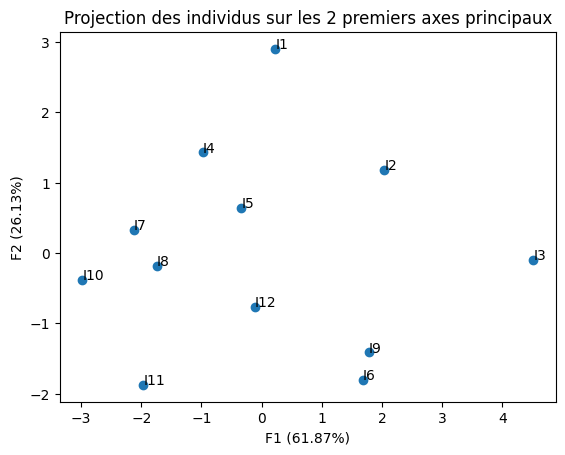

In [43]:
plt.title("Projection des individus sur les 2 premiers axes principaux")
plt.scatter(composantes_principales.iloc[:,0],composantes_principales.iloc[:,1])
plt.xlabel("F1 ({}%)".format(round(inertie[0]*100,2)))
plt.ylabel("F2 ({}%)".format(round(inertie[1]*100,2)))

for i, txt in enumerate(composantes_principales.index):
    plt.annotate(txt, (composantes_principales.iloc[i,0], composantes_principales.iloc[i,1]))

# 5. Coordonnées des variables sur tous les axes principaux

In [44]:
eigenVectors = pd.DataFrame(eigenVectors)
coordonnees = np.sqrt(eigenValues) * eigenVectors
coordonnees.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
coordonnees.index = X.columns
coordonnees

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Produits laitiers,0.581754,0.708785,0.350703,-0.167223,-0.078421,-0.045372,0.004659
Pommes de terre,0.968482,0.129187,0.052986,0.025652,0.200663,-0.039949,-0.005146
Fruits,0.929664,-0.274938,-0.117304,-0.197190,0.024009,0.082866,0.006761
Viande Blanche,0.911985,-0.264210,-0.282534,0.111503,-0.059808,-0.047514,0.019577
Viande,0.962139,-0.187830,-0.166188,0.012980,-0.102556,-0.011366,-0.023980
Pain,0.496508,0.843530,0.008047,0.192132,-0.016062,0.068545,0.001068
Légumes secs,-0.431602,0.646429,-0.619280,-0.107011,0.022810,-0.019191,-0.001565


# 6.Afficher un tableau résumant les corrélations entre les variables et les axes principaux.


In [45]:
correlations = pd.DataFrame(np.corrcoef(Z, composantes_principales, rowvar=False)[:Z.shape[1], Z.shape[1]:]) # calcul des corrélations entre les variables initiales et les composantes principales
correlations.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7']
correlations.index = X.columns
correlations


,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Produits laitiers,0.581754,0.708785,0.350703,-0.167223,-0.078421,-0.045372,0.004659
Pommes de terre,0.968482,0.129187,0.052986,0.025652,0.200663,-0.039949,-0.005146
Fruits,0.929664,-0.274938,-0.117304,-0.197190,0.024009,0.082866,0.006761
Viande Blanche,0.911985,-0.264210,-0.282534,0.111503,-0.059808,-0.047514,0.019577
Viande,0.962139,-0.187830,-0.166188,0.012980,-0.102556,-0.011366,-0.023980
Pain,0.496508,0.843530,0.008047,0.192132,-0.016062,0.068545,0.001068
Légumes secs,-0.431602,0.646429,-0.619280,-0.107011,0.022810,-0.019191,-0.001565


# 7. Projection des variables sur le plan principal


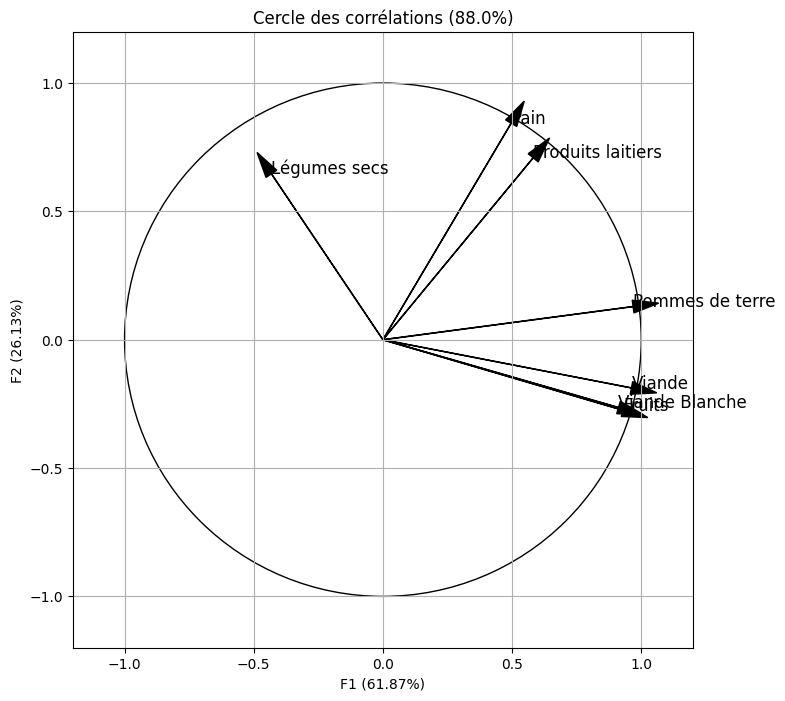

In [46]:
# Cercle des corrélations

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("F1 ({}%)".format(round(inertie[0]*100, 2)))
ax.set_ylabel("F2 ({}%)".format(round(inertie[1]*100, 2)))
ax.set_title('Cercle des corrélations ({}%)'.format(round((inertie[0]+inertie[1])*100, 2)))
ax.add_patch(plt.Circle((0, 0), 1, fill=False))
ax.grid()
for i, text in enumerate(Z.columns):
    ax.arrow(0, 0, correlations.iloc[i, 0], correlations.iloc[i, 1],
             head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(correlations.iloc[i, 0], correlations.iloc[i, 1], text, fontsize='large')
plt.show()


# 8. Intrepretation
- Les variables 'Pommes de terre', 'Fruits', 'Viande Blanche', 'Viande' ont des coordonnées similaires sur la première composante principale, suggérant qu'elles sont corrélées positivement entre elles. Cela peut indiquer que ces aliments sont souvent consommés ensemble.
- La variable 'Produits laitiers' est corrélée positivement avec la deuxième composante principale, ce qui peut indiquer qu'elle est différente des autres variables en termes de composition nutritionnelle.
- Les variables 'Pain' et 'Légumes secs' ont des coordonnées similaires sur la deuxième composante principale, suggérant une corrélation positive entre elles. Cela peut indiquer que ces aliments sont souvent consommés ensemble.

# 9. Qualité de représentation des individus

In [47]:
points = composantes_principales.iloc[:,:2] # on ne garde que les 2 premiers axes
# calucul de la qualite de représentation des individus
qualite = np.sum(points**2, axis=1) / np.linalg.norm(Z, axis=1)**2
qualite

I1     0.951788
I2     0.807562
I3     0.956259
I4     0.945536
I5     0.667061
I6     0.934046
I7     0.992282
I8     0.901063
I9     0.790357
I10    0.960676
I11    0.793248
I12    0.191334
dtype: float64

# 10. contribution  de  chaque  individu  à  l’inertie  de  chaque  axe  principal.

In [48]:
contribition = (1/points.shape[0] * (points**2)) / eigenValues[:2]
contribition

,PC1,PC2
I1,0.001003,0.384020
I2,0.079984,0.064065
I3,0.392260,0.000400
I4,0.018210,0.093634
I5,0.002186,0.019065
I6,0.054473,0.148801
I7,0.087098,0.005138
I8,0.058676,0.001472
I9,0.060875,0.090618
I10,0.170804,0.006651


# 11. Marquer graphiquement tous les individus ayant une très bonne qualité de représentation.

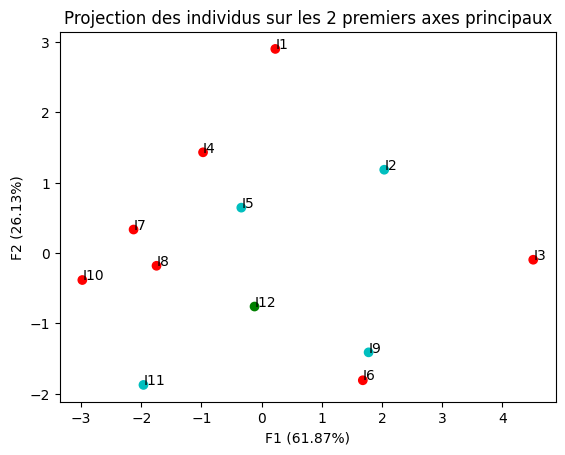

In [56]:

colors = ['r' if i > 0.9 else 'g' if i < 0.3 else 'c' for i in qualite]


plt.title("Projection des individus sur les 2 premiers axes principaux")
plt.scatter(composantes_principales.iloc[:,0],composantes_principales.iloc[:,1], c=colors)
plt.xlabel("F1 ({}%)".format(round(inertie[0]*100,2)))
plt.ylabel("F2 ({}%)".format(round(inertie[1]*100,2)))

for i, txt in enumerate(composantes_principales.index):
    plt.annotate(txt, (composantes_principales.iloc[i,0], composantes_principales.iloc[i,1]))

# 12. Déterminer les individus qui sont mal présentes sur le plan principal. Par quoi, pouvez-vous interpréter ça ? 
test